In this notebook, we will explore two ways of perturbation on our Kitaev ladder,
$$
    H = H_0+H^\prime
$$
where $H_0$ is the original KL Hamiltonian,
$$
    H_0 := \sum_n J_z \sigma^z_{2n - 1} \sigma^z_{2n} + J_x \sigma^x_{2n} \sigma^x_{2n+1} + J_y \sigma^y_{2n-1} \sigma^y_{2n+2}
$$
and $H^\prime$ is the perturbative Hamiltonian,
$$
    H^\prime := g\sum_n \sigma^z_n + h\sum_n \sigma^x_{2n - 1} \sigma^x_{2n}
$$

Our perpuse to design such a perturbative term is clear: $H^\prime \equiv H^\prime_1 + H^\prime_2$ respectively, and $H^\prime_1$ breaks the global $X$ and $Y$ explicitly while $H^\prime_2$ breaks the single-leg global $Z$.

The procedure can be divided into the following steps:
 1. Read the old files and extract the wave functions along the line $x + y = 2z$
 2. Use the wave functions as input (initial guesses) to generate the GS for $g>0$ and $h>0$ to see what happens.

# Read the wave-functions on the line $J_x + J_y = 2 J_z$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from kitaev_ladder_snake1 import load_data
from utility import linspace

In [3]:
folder_name = 'Spin_half_snake1_L_4_chi_256_two_lines/'

chi = 256
L=4

Jx = 1.0
Jy = 1.0
Jz = 1.0

In [4]:
load_data(prefix=folder_name, chi=chi, Jx=Jx, Jy=Jy, Jz=Jz, L=L)

{'energy': -0.8388049859312758,
 'parameters': {'Jx': 1.0,
  'Jy': 1.0,
  'Jz': 1.0,
  'L': 4,
  'chi': 256,
  'initial': 'random',
  'initial_psi': <tenpy.networks.mps.MPS at 0x7f7f752fa9d0>,
  'max_E_err': 1e-06,
  'max_S_err': 0.0001,
  'max_sweeps': 200},
 'psi': <tenpy.networks.mps.MPS at 0x7f7f752fac10>,
 'sweeps_stat': {'E': [-0.8388049859310556,
   -0.8388049859313895,
   -0.8388049859312545,
   -0.8388049859314606,
   -0.8388049859309774,
   -0.8388049859312758],
  'N_updates': [240, 480, 720, 960, 1200, 1440],
  'S': [nan, nan, nan, nan, 0.530086050024136, 0.5300860500247706],
  'max_E_trunc': [6.821210263296962e-13,
   3.410605131648481e-13,
   1.8189894035458565e-12,
   2.0463630789890885e-12,
   6.821210263296962e-13,
   1.8189894035458565e-12],
  'max_chi': [83, 83, 90, 85, 70, 66],
  'max_trunc_err': [1.3854905266884507e-19,
   1.2208857526297053e-19,
   1.3168119031803127e-19,
   1.179618296473183e-19,
   1.2856963521972614e-19,
   6.336891352996493e-20],
  'norm_err': 

In [5]:
Jx_list = linspace(0, 2.0, 201)
Jy_list = linspace(2.0, 0, 201)
J_list = [(Jx_list[n], Jy_list[n], 1.0) for n in range(len(Jx_list))]

In [6]:
psi_list = [load_data(prefix=folder_name, chi=chi, Jx=J[0], Jy=J[1], Jz=J[2], L=L)['psi'] for J in J_list]

In [21]:
S_list = [np.mean(psi.entanglement_entropy()) for psi in psi_list]

In [23]:
chi_list = [psi.correlation_length() for psi in psi_list]

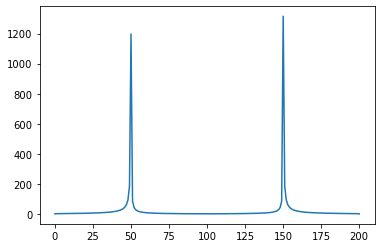

In [28]:
plt.plot(chi_list)

# Use Perturbative Kitaev Ladder

In [7]:
from kitaev_ladder_snake1_perturb import run_atomic, save_after_run, load_data

In [10]:
g_list = linspace(0.1, 1.0, 10)
h = 0.0

In [16]:
J_list[::-1][:101]

[(2.0, 0.0, 1.0),
 (1.99, 0.01, 1.0),
 (1.98, 0.02, 1.0),
 (1.97, 0.03, 1.0),
 (1.96, 0.04, 1.0),
 (1.95, 0.05, 1.0),
 (1.94, 0.06, 1.0),
 (1.93, 0.07, 1.0),
 (1.92, 0.08, 1.0),
 (1.91, 0.09, 1.0),
 (1.9, 0.1, 1.0),
 (1.89, 0.11, 1.0),
 (1.88, 0.12, 1.0),
 (1.87, 0.13, 1.0),
 (1.86, 0.14, 1.0),
 (1.85, 0.15, 1.0),
 (1.84, 0.16, 1.0),
 (1.83, 0.17, 1.0),
 (1.82, 0.18, 1.0),
 (1.81, 0.19, 1.0),
 (1.8, 0.2, 1.0),
 (1.79, 0.21, 1.0),
 (1.78, 0.22, 1.0),
 (1.77, 0.23, 1.0),
 (1.76, 0.24, 1.0),
 (1.75, 0.25, 1.0),
 (1.74, 0.26, 1.0),
 (1.73, 0.27, 1.0),
 (1.72, 0.28, 1.0),
 (1.71, 0.29, 1.0),
 (1.7, 0.3, 1.0),
 (1.69, 0.31, 1.0),
 (1.68, 0.32, 1.0),
 (1.67, 0.33, 1.0),
 (1.66, 0.34, 1.0),
 (1.65, 0.35, 1.0),
 (1.64, 0.36, 1.0),
 (1.63, 0.37, 1.0),
 (1.62, 0.38, 1.0),
 (1.61, 0.39, 1.0),
 (1.6, 0.4, 1.0),
 (1.59, 0.41, 1.0),
 (1.58, 0.42, 1.0),
 (1.57, 0.43, 1.0),
 (1.56, 0.44, 1.0),
 (1.55, 0.45, 1.0),
 (1.54, 0.46, 1.0),
 (1.53, 0.47, 1.0),
 (1.52, 0.48, 1.0),
 (1.51, 0.49, 1.0),
 (1.5, 0.5

In [18]:
# the folder name for storing data
folder_prefix = f'Spin_half_snake1_Perturbed_L_{L}_chi_{chi}/' # high resolution means the smallest step is 0.01

# generate the function for running and storing the data in the folder we want
run_save = save_after_run(run_atomic, folder_prefix=folder_prefix)

initial_psi = None

chi = 64
for n in range(101):
    psi = psi_list[::-1][n]
    Jx = J_list[::-1][n][0]
    Jy = J_list[::-1][n][1]
    Jz = 1.0
    initial_psi = psi.copy()
    for g in g_list:
        result = run_save(Jx=Jx, Jy=Jy, Jz=Jz, g=g, h=h, L=L, chi=chi, initial_psi=initial_psi, verbose=1)
        if result==0: # this file already exists
            result = load_data(Jx=Jx,Jy=Jy,Jz=Jz, g=g, h=h,L=L,chi=chi,prefix=folder_prefix)
            pass 
        initial_psi=result['psi'].copy()

Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=2.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.1 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Re

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [14, 9, 14, 9, 14, 9, 14, 9]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000033+1.047655819457581e-17j)
After the canonicalization:
Bond dim =  [14, 9, 14, 9, 14, 9, 14, 9]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=2.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadder

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [14, 9, 14, 9, 14, 9, 14, 9]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000064+9.71339578806062e-17j)
After the canonicalization:
Bond dim =  [14, 9, 14, 9, 14, 9, 14, 9]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=2.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.3 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [14, 9, 14, 9, 14, 9, 14, 9]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000109+6.875509588032859e-17j)
After the canonicalization:
Bond dim =  [14, 9, 14, 9, 14, 9, 14, 9]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=2.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadder

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [14, 9, 14, 9, 14, 9, 14, 9]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000024-1.7680055770614704e-16j)
After the canonicalization:
Bond dim =  [14, 9, 14, 9, 14, 9, 14, 9]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=2.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadde

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [13, 9, 12, 9, 13, 9, 12, 9]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000036+9.923593874766394e-17j)
After the canonicalization:
Bond dim =  [13, 9, 12, 9, 13, 9, 12, 9]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=2.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.6 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadder

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [12, 9, 12, 9, 12, 9, 12, 9]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999984+3.666245151168788e-17j)
After the canonicalization:
Bond dim =  [12, 9, 12, 9, 12, 9, 12, 9]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=2.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.7 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadder

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [11, 7, 10, 7, 10, 7, 10, 7]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999951-2.3609613668306387e-16j)
After the canonicalization:
Bond dim =  [11, 7, 10, 7, 10, 7, 10, 7]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=2.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.8 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadde

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000029-2.65521414478569e-16j)
After the canonicalization:
Bond dim =  [10, 7, 10, 7, 10, 7, 10, 7]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=2.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.9 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel


==============================START===========================

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000047-2.33383091180801e-16j)
After the canonicalization:
Bond dim =  [10, 7, 10, 7, 10, 7, 10, 7]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=2.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel


==============================START===========================

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000013+3.1151858659537123e-16j)
After the canonicalization:
Bond dim =  [10, 7, 10, 7, 10, 7, 10, 7]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.99 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.01 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.1 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel


==============================START=======================

Updating environment
.....
sweep 50, age = 1368
Energy = -1.0656146122617542, S = 0.4093099410686085, norm_err = 1.9e-04
Current memory usage 832.1 MB, time elapsed: 69.3 s
Delta E = -9.0170e-04, Delta S = -3.0098e-04 (per sweep)
max_trunc_err = 2.8284e-09, max_E_trunc = -1.1066e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 60, age = 1608
Energy = -1.0670270535427733, S = 0.3926255388335164, norm_err = 1.7e-08
Current memory usage 832.1 MB, time elapsed: 81.9 s
Delta E = -1.4124e-04, Delta S = -1.6684e-03 (per sweep)
max_trunc_err = 8.4615e-09, max_E_trunc = -9.9431e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 70, age = 1848
Energy = -1.0378352822534112, S = 0.4284807354242055, norm_err = 4.9e-03
Current memory usage 832.1 MB, time elapsed: 94.5 s
Delta E = 2.9192e-03, Delta S = 3.5855e-03 (per sweep)
max_trunc_err = 1.4905e-09, max_E_trunc = -2.7262e-10
MPS bond dimensions: [64, 64, 64, 64, 64, 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.44e-05
Call psi.canonical_form()
DMRG finished after 140 sweeps.
total size = 3928, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000022-6.245004513516506e-17j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPer

Updating environment
.....
sweep 150, age = 3768
Energy = 1.2708182178055267, S = 2.1421348008168541, norm_err = 2.7e-01
Current memory usage 832.1 MB, time elapsed: 188.7 s
Delta E = 2.3468e-01, Delta S = 1.7651e-01 (per sweep)
max_trunc_err = 8.3989e-09, max_E_trunc = -4.4474e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 160, age = 4008
Energy = 0.1451349635412953, S = 2.4390424053155746, norm_err = 2.9e-04
Current memory usage 832.1 MB, time elapsed: 201.0 s
Delta E = -1.1257e-01, Delta S = 2.9691e-02 (per sweep)
max_trunc_err = 9.6753e-09, max_E_trunc = -1.5884e-08
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 4248
Energy = -1.0727789307768489, S = 0.3865288888184699, norm_err = 6.3e-07
Current memory usage 832.1 MB, time elapsed: 213.2 s
Delta E = -1.2179e-01, Delta S = -2.0525e-01 (per sweep)
max_trunc_err = 7.6068e-09, max_E_trunc = -3.6007e-09
MPS bond dimensions: [64, 64, 64, 64, 6

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
Updating environment
.....
DMRG finished after 200 sweeps.
total size = 5128, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000005+2.357312412194521e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.99 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.01 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturb

Updating environment
.....
sweep 160, age = 4008
Energy = -1.0700385692931320, S = 0.4139654087116897, norm_err = 3.0e-03
Current memory usage 832.1 MB, time elapsed: 202.8 s
Delta E = 1.6970e-03, Delta S = 2.6412e-03 (per sweep)
max_trunc_err = 6.0848e-10, max_E_trunc = -7.0258e-10
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 4248
Energy = -1.0907981969110097, S = 0.3737316961649543, norm_err = 1.5e-09
Current memory usage 832.1 MB, time elapsed: 215.0 s
Delta E = -2.0760e-03, Delta S = -4.0234e-03 (per sweep)
max_trunc_err = 1.2338e-07, max_E_trunc = -1.1341e-07
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 4488
Energy = 0.0868072061813905, S = 2.7255442331955773, norm_err = 1.7e-05
Current memory usage 832.1 MB, time elapsed: 227.2 s
Delta E = 1.1776e-01, Delta S = 2.3518e-01 (per sweep)
max_trunc_err = 1.1760e-08, max_E_trunc = -7.2005e-09
MPS bond dimensions: [64, 64, 64, 64, 6

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
DMRG finished after 200 sweeps.
total size = 5048, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999964-2.8856912834503454e-17j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.99 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.01 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.5 for

Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000004-1.537830667387545e-17j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.99 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.01 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.6 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config Ki

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [29, 29, 29, 29, 29, 29, 29, 29]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000018-5.819556804769616e-16j)
After the canonicalization:
Bond dim =  [29, 29, 29, 29, 29, 29, 29, 29]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.99 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.01 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.7 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config Ki

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 23, 24, 23, 24, 23, 24, 24]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999976-2.5899555161168334e-16j)
After the canonicalization:
Bond dim =  [24, 23, 24, 23, 24, 23, 24, 24]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.99 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.01 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.8 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config K

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [22, 23, 22, 23, 22, 23, 22, 23]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000004+1.6002294670294012e-16j)
After the canonicalization:
Bond dim =  [22, 23, 22, 23, 22, 23, 22, 23]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.99 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.01 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.9 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config K

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [22, 24, 22, 24, 22, 23, 22, 24]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000049-1.2063189806596062e-16j)
After the canonicalization:
Bond dim =  [22, 24, 22, 24, 22, 23, 22, 24]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.99 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.01 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config K

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [21, 24, 21, 24, 21, 23, 21, 23]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000002-8.241672928431705e-17j)
After the canonicalization:
Bond dim =  [21, 24, 21, 24, 21, 23, 21, 23]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.98 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.02 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.1 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config Kit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
DMRG finished after 80 sweeps.
total size = 2168, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000062-2.292381593462813e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.98 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.02 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.2 for 

Updating environment
.....
sweep 160, age = 4008
Energy = 2.3329622859712345, S = 1.9730531812534962, norm_err = 3.6e-01
Current memory usage 832.1 MB, time elapsed: 204.5 s
Delta E = 2.7270e-01, Delta S = 1.1009e-01 (per sweep)
max_trunc_err = 3.4121e-09, max_E_trunc = -4.9995e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 4248
Energy = -1.0567645486755168, S = 0.3970278243976515, norm_err = 3.8e-04
Current memory usage 832.1 MB, time elapsed: 216.8 s
Delta E = -3.3897e-01, Delta S = -1.5760e-01 (per sweep)
max_trunc_err = 2.4863e-08, max_E_trunc = -1.7385e-08
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 4488
Energy = -1.0586203709914912, S = 0.4676584719850859, norm_err = 1.8e-04
Current memory usage 832.1 MB, time elapsed: 229.1 s
Delta E = -1.8558e-04, Delta S = 7.0631e-03 (per sweep)
max_trunc_err = 1.1710e-08, max_E_trunc = -9.7561e-09
MPS bond dimensions: [64, 64, 64, 64, 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
Updating environment
.....
DMRG finished after 200 sweeps.
total size = 5128, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.999999999999996-4.820275243900071e-17j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.98 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.02 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturb

Updating environment
.....
sweep 160, age = 4008
Energy = -0.8937072134261257, S = 0.6109068462621599, norm_err = 2.5e-02
Current memory usage 832.1 MB, time elapsed: 208.0 s
Delta E = 1.7581e-02, Delta S = 1.7376e-02 (per sweep)
max_trunc_err = 6.2931e-09, max_E_trunc = -3.6644e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 4248
Energy = -1.0654694116298629, S = 0.5121930170997124, norm_err = 6.7e-05
Current memory usage 832.1 MB, time elapsed: 220.3 s
Delta E = -1.7176e-02, Delta S = -9.8714e-03 (per sweep)
max_trunc_err = 4.4344e-08, max_E_trunc = -8.5915e-08
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 4488
Energy = 0.3443413716199757, S = 2.4046596984266895, norm_err = 1.1e-02
Current memory usage 832.1 MB, time elapsed: 232.6 s
Delta E = 1.4098e-01, Delta S = 1.8925e-01 (per sweep)
max_trunc_err = 2.5582e-09, max_E_trunc = -1.0195e-09
MPS bond dimensions: [64, 64, 64, 64, 6

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
Updating environment
.....
DMRG finished after 200 sweeps.
total size = 5128, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000027+8.901932836069748e-17j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.98 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.02 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPertur

Updating environment
.....
sweep 160, age = 4008
Energy = -1.0794381540546851, S = 0.3920406331797800, norm_err = 1.5e-05
Current memory usage 832.1 MB, time elapsed: 200.2 s
Delta E = 2.1944e-05, Delta S = -1.5100e-03 (per sweep)
max_trunc_err = 1.4200e-08, max_E_trunc = -1.0399e-08
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 4248
Energy = -1.0740332518350897, S = 0.4574768044969242, norm_err = 4.1e-04
Current memory usage 832.1 MB, time elapsed: 212.5 s
Delta E = 5.4049e-04, Delta S = 6.5436e-03 (per sweep)
max_trunc_err = 1.2323e-07, max_E_trunc = -3.0129e-07
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 4488
Energy = 1.2647107943888614, S = 2.5807403378760405, norm_err = 1.3e-01
Current memory usage 832.1 MB, time elapsed: 224.9 s
Delta E = 2.3387e-01, Delta S = 2.1233e-01 (per sweep)
max_trunc_err = 4.4563e-09, max_E_trunc = -6.3710e-09
MPS bond dimensions: [64, 64, 64, 64, 64

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.25e-02
Call psi.canonical_form()
DMRG finished after 200 sweeps.
total size = 5368, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000022-2.237793284010081e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPer

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [41, 39, 41, 39, 41, 38, 41, 38]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999998-4.2256604972077164e-16j)
After the canonicalization:
Bond dim =  [41, 39, 41, 39, 41, 38, 41, 38]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.98 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.02 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.6 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config K

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [35, 34, 36, 34, 35, 34, 35, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000047+2.7019834025146385e-16j)
After the canonicalization:
Bond dim =  [35, 34, 36, 34, 35, 34, 35, 34]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.98 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.02 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.7 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config K

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [27, 27, 27, 27, 27, 27, 27, 28]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999987-1.7244563121463307e-16j)
After the canonicalization:
Bond dim =  [27, 27, 27, 27, 27, 27, 27, 28]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.98 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.02 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.8 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config K

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [26, 26, 26, 25, 27, 25, 26, 26]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000069+9.78838950083154e-17j)
After the canonicalization:
Bond dim =  [26, 26, 26, 25, 27, 25, 26, 26]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.98 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.02 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.9 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config Kit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [27, 26, 27, 25, 27, 25, 27, 26]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000004+2.410410128331035e-16j)
After the canonicalization:
Bond dim =  [27, 26, 27, 25, 27, 25, 27, 26]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.98 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.02 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config Ki

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [26, 25, 26, 25, 26, 25, 26, 26]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999969+1.2825095260966812e-16j)
After the canonicalization:
Bond dim =  [26, 25, 26, 25, 26, 25, 26, 26]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.97 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.03 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.1 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config K

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
Updating environment
.....
Updating environment
.....
DMRG finished after 40 sweeps.
total size = 1368, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999976-2.1310089609209676e-17j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.97 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.03 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config Kit

.....
sweep 150, age = 3768
Energy = -1.0316662391435614, S = 0.7293542602182310, norm_err = 1.3e-03
Current memory usage 832.1 MB, time elapsed: 189.5 s
Delta E = 1.9193e-03, Delta S = 2.4312e-02 (per sweep)
max_trunc_err = 4.2140e-08, max_E_trunc = -5.7083e-08
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 160, age = 4008
Energy = 0.2147439021071591, S = 2.1737132302312796, norm_err = 4.0e-04
Current memory usage 832.1 MB, time elapsed: 201.9 s
Delta E = 1.2464e-01, Delta S = 1.4444e-01 (per sweep)
max_trunc_err = 5.4890e-09, max_E_trunc = -3.4543e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 4248
Energy = -1.0570958259106646, S = 0.4926445783734474, norm_err = 7.7e-06
Current memory usage 832.1 MB, time elapsed: 214.2 s
Delta E = -1.2718e-01, Delta S = -1.6811e-01 (per sweep)
max_trunc_err = 1.1304e-08, max_E_trunc = -9.0222e-10
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64]
Updati

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
Updating environment
.....
DMRG finished after 200 sweeps.
total size = 5128, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000044+3.3260839786528637e-17j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.97 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.03 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPertu

Updating environment
.....
sweep 160, age = 4008
Energy = -1.0681937913691399, S = 0.4139898757117679, norm_err = 4.9e-07
Current memory usage 832.1 MB, time elapsed: 201.2 s
Delta E = -2.1044e-01, Delta S = -2.0271e-01 (per sweep)
max_trunc_err = 4.8961e-10, max_E_trunc = -1.1246e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 4248
Energy = -1.0576212655680592, S = 0.4341347442876557, norm_err = 1.1e-03
Current memory usage 832.1 MB, time elapsed: 213.5 s
Delta E = 1.0573e-03, Delta S = 2.0145e-03 (per sweep)
max_trunc_err = 1.8155e-08, max_E_trunc = -2.8302e-08
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 4488
Energy = -1.0654830624328042, S = 0.4240598979596977, norm_err = 6.1e-05
Current memory usage 832.1 MB, time elapsed: 225.8 s
Delta E = -7.8618e-04, Delta S = -1.0075e-03 (per sweep)
max_trunc_err = 3.3500e-08, max_E_trunc = -4.6077e-08
MPS bond dimensions: [64, 64, 64, 64

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 5.38e-05
Call psi.canonical_form()
DMRG finished after 200 sweeps.
total size = 5368, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999969+6.722053469410127e-17j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPer

Updating environment
.....
sweep 150, age = 3768
Energy = -0.1520752408023327, S = 1.1711410514950664, norm_err = 1.4e-01
Current memory usage 832.1 MB, time elapsed: 192.1 s
Delta E = 9.2724e-02, Delta S = 7.7083e-02 (per sweep)
max_trunc_err = 1.5099e-08, max_E_trunc = -9.1910e-08
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 160, age = 4008
Energy = -1.0797183201365783, S = 0.3439768138546154, norm_err = 5.8e-08
Current memory usage 832.1 MB, time elapsed: 204.5 s
Delta E = -9.2764e-02, Delta S = -8.2716e-02 (per sweep)
max_trunc_err = 1.2152e-07, max_E_trunc = -1.6897e-07
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 4248
Energy = 0.3099139410080056, S = 2.4345081365469468, norm_err = 8.8e-04
Current memory usage 832.1 MB, time elapsed: 217.0 s
Delta E = 1.3896e-01, Delta S = 2.0905e-01 (per sweep)
max_trunc_err = 4.1118e-08, max_E_trunc = -1.1796e-07
MPS bond dimensions: [64, 64, 64, 64, 6

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
DMRG finished after 200 sweeps.
total size = 5048, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999971+3.466838090476071e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.97 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.03 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.5 for 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [49, 44, 48, 43, 49, 43, 48, 43]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000104+2.5083017260452145e-16j)
After the canonicalization:
Bond dim =  [49, 44, 48, 43, 49, 43, 48, 43]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.97 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.03 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.6 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config K

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [40, 39, 40, 39, 40, 39, 40, 40]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000107+5.619025577948089e-17j)
After the canonicalization:
Bond dim =  [40, 39, 40, 39, 40, 39, 40, 40]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.97 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.03 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.7 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config Ki

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 31, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000147-2.079610884516066e-17j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 31, 32]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.97 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.03 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.8 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config Ki

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [31, 30, 31, 29, 31, 29, 31, 30]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000138-7.296680620827445e-16j)
After the canonicalization:
Bond dim =  [31, 30, 31, 29, 31, 29, 31, 30]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.97 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.03 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.9 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config Ki

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [29, 29, 29, 28, 29, 29, 29, 29]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000038+1.8176035360306653e-16j)
After the canonicalization:
Bond dim =  [29, 29, 29, 28, 29, 29, 29, 29]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.97 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.03 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config K

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [29, 28, 29, 29, 29, 29, 29, 28]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000089+2.1821771006933638e-16j)
After the canonicalization:
Bond dim =  [29, 28, 29, 29, 29, 29, 29, 28]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.96 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.04 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.1 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config K

Updating environment
.....
sweep 160, age = 4008
Energy = -1.0434976079943112, S = 0.4531252022438813, norm_err = 3.4e-05
Current memory usage 832.1 MB, time elapsed: 201.1 s
Delta E = 3.4767e-04, Delta S = -1.2822e-02 (per sweep)
max_trunc_err = 1.2411e-08, max_E_trunc = -9.2705e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 4248
Energy = -1.0435247220709130, S = 0.6115600668228783, norm_err = 7.3e-06
Current memory usage 832.1 MB, time elapsed: 213.5 s
Delta E = -2.7114e-06, Delta S = 1.5843e-02 (per sweep)
max_trunc_err = 2.9573e-08, max_E_trunc = -1.1553e-08
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 4488
Energy = 1.2465793319043996, S = 1.8878775547288797, norm_err = 1.1e-01
Current memory usage 832.1 MB, time elapsed: 226.0 s
Delta E = 2.2901e-01, Delta S = 1.2763e-01 (per sweep)
max_trunc_err = 1.4956e-08, max_E_trunc = -2.4117e-08
MPS bond dimensions: [64, 64, 64, 64, 6

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
Updating environment
.....
DMRG finished after 200 sweeps.
total size = 5128, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000002+2.874103029007682e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.96 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.04 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPertur

Updating environment
.....
sweep 160, age = 4008
Energy = -1.0264119204186954, S = 0.5545225241643644, norm_err = 3.7e-03
Current memory usage 832.1 MB, time elapsed: 206.8 s
Delta E = 2.4547e-03, Delta S = 4.1339e-03 (per sweep)
max_trunc_err = 1.1419e-08, max_E_trunc = -2.4409e-08
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 4248
Energy = -1.0513662740114000, S = 0.4973863558023241, norm_err = 2.5e-05
Current memory usage 832.1 MB, time elapsed: 219.2 s
Delta E = -2.4954e-03, Delta S = -5.7136e-03 (per sweep)
max_trunc_err = 1.3513e-08, max_E_trunc = -1.5806e-08
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 4488
Energy = -1.0490434430989808, S = 0.5294418126807346, norm_err = 1.3e-04
Current memory usage 832.1 MB, time elapsed: 231.6 s
Delta E = 2.3228e-04, Delta S = 3.2055e-03 (per sweep)
max_trunc_err = 1.6914e-08, max_E_trunc = -2.8090e-08
MPS bond dimensions: [64, 64, 64, 64, 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.01e-03
Call psi.canonical_form()
DMRG finished after 200 sweeps.
total size = 5368, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999973-3.0531133177191805e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPe

Updating environment
.....
sweep 150, age = 3768
Energy = -1.0566023443389270, S = 0.3889342964367968, norm_err = 4.5e-05
Current memory usage 832.1 MB, time elapsed: 191.6 s
Delta E = -1.6026e-02, Delta S = -3.0578e-02 (per sweep)
max_trunc_err = 4.9262e-08, max_E_trunc = -6.6805e-08
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 160, age = 4008
Energy = -1.0595463997973980, S = 0.4179108246744312, norm_err = 8.1e-06
Current memory usage 832.1 MB, time elapsed: 204.1 s
Delta E = -2.9441e-04, Delta S = 2.8977e-03 (per sweep)
max_trunc_err = 2.2830e-08, max_E_trunc = -1.4909e-07
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 4248
Energy = -1.0584061339084769, S = 0.4033382095018914, norm_err = 6.7e-06
Current memory usage 832.1 MB, time elapsed: 216.5 s
Delta E = 1.1403e-04, Delta S = -1.4573e-03 (per sweep)
max_trunc_err = 3.4256e-08, max_E_trunc = -4.7666e-08
MPS bond dimensions: [64, 64, 64, 64

Updating environment
.....
sweep 100, age = 2568
Energy = -1.0205705312742168, S = 0.4903658550090934, norm_err = 7.9e-03
Current memory usage 832.1 MB, time elapsed: 129.8 s
Delta E = -1.2660e-01, Delta S = -1.8591e-01 (per sweep)
max_trunc_err = 1.4136e-08, max_E_trunc = -1.0309e-08
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 110, age = 2808
Energy = -1.0775149097658812, S = 0.3904328189109851, norm_err = 8.2e-09
Current memory usage 832.1 MB, time elapsed: 142.2 s
Delta E = -5.6944e-03, Delta S = -9.9933e-03 (per sweep)
max_trunc_err = 2.0820e-08, max_E_trunc = -1.7259e-08
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 120, age = 3048
Energy = 1.2463717545916495, S = 2.3409616898104186, norm_err = 2.2e-01
Current memory usage 832.1 MB, time elapsed: 154.5 s
Delta E = 2.3239e-01, Delta S = 1.9505e-01 (per sweep)
max_trunc_err = 1.6016e-07, max_E_trunc = -5.6992e-07
MPS bond dimensions: [64, 64, 64, 64,

KeyboardInterrupt: 

In [13]:
g

0.08

Using `L=4` is far too slow. Let's use `L=2`.

In [29]:
L = 2
chi = 64
Jx_list = linspace(1.1, 2.0, 10) # increase Jx so that we are always in the better region for x instaed of y
Jy_list = linspace(0.9, 0.0, 10)
Jz = 1.0
g = 0.0
g_list = linspace(0.1, 1.0, 10)
h = 0.0

In [28]:
Jx_list

[1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]

In [25]:
# initialization
Jx = 1.0
Jy = 1.0
initial_psi = None
for chi in [2, 4, 8, 16, 32, 64]:
    result = run_save(Jx=Jx, Jy=Jy, Jz=Jz, g=g, h=h, L=L, chi=chi, initial_psi=initial_psi, verbose=1)
    if result==0: # this file already exists
            result = load_data(Jx=Jx,Jy=Jy,Jz=Jz, g=g, h=h,L=L,chi=chi,prefix=folder_prefix)
            pass 
    initial_psi = result['psi'].copy()

Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel


==============================START==============================
Chi =  2 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Rea

Updating environment
.....
sweep 180, age = 2244
Energy = -0.5000000000001137, S = 0.1653796099995873, norm_err = 2.8e-06
Current memory usage 832.1 MB, time elapsed: 10.8 s
Delta E = -1.4211e-14, Delta S = -1.5744e-03 (per sweep)
max_trunc_err = 7.6544e-02, max_E_trunc = 3.4398e-01
MPS bond dimensions: [2, 2, 2, 2]
Updating environment
.....
sweep 190, age = 2364
Energy = -0.6229174623531435, S = 0.3696814523553419, norm_err = 8.8e-16
Current memory usage 832.1 MB, time elapsed: 11.3 s
Delta E = -1.2292e-02, Delta S = 2.0430e-02 (per sweep)
max_trunc_err = 7.3917e-02, max_E_trunc = 2.8252e-01
MPS bond dimensions: [2, 2, 2, 2]
Updating environment
.....
sweep 200, age = 2484
Energy = -0.6126146409429793, S = 0.4101984632465243, norm_err = 1.6e-15
Current memory usage 832.1 MB, time elapsed: 11.9 s
Delta E = 1.0303e-03, Delta S = 4.0517e-03 (per sweep)
max_trunc_err = 5.3397e-02, max_E_trunc = 3.0126e-01
MPS bond dimensions: [2, 2, 2, 2]
DMRG finished after 200 sweeps.
total size = 2484

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel


==============================START==============================
Chi =  4 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Rea

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel


==============================START==============================
Chi =  8 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Rea

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8388049833877744, S = nan, norm_err = 1.6e-09
Current memory usage 832.1 MB, time elapsed: 2.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.3535e-10, max_E_trunc = 2.1080e-09
MPS bond dimensions: [16, 16, 16, 16]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8388049847889221, S = nan, norm_err = 4.1e-10
Current memory usage 832.1 MB, time elapsed: 5.2 s
Delta E = -1.4011e-10, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.3205e-10, max_E_trunc = 2.0251e-09
MPS bond dimensions: [16, 16, 16, 16]
Convergence criterium reached

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000003+9.194034422677078e-17j)
After the canonicalization:
Bond dim =  [27, 32, 27, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel


==============================START==============================
Chi =  6

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000058+3.241933902321109e-16j)
After the canonicalization:
Bond dim =  [28, 38, 28, 38]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================


In [30]:

for n in range(len(Jx_list)):
    Jx = Jx_list[n]
    Jy = Jy_list[n]
    result = run_save(Jx=Jx, Jy=Jy, Jz=Jz, g=g, h=h, L=L, chi=chi, initial_psi=initial_psi, verbose=1)
    if result==0: # this file already exists
            result = load_data(Jx=Jx,Jy=Jy,Jz=Jz, g=g, h=h,L=L,chi=chi,prefix=folder_prefix)
            pass 
    initial_psi = result['psi'].copy()

Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.1 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.9 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Re

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000009-2.220446049250313e-16j)
After the canonicalization:
Bond dim =  [28, 41, 28, 40]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.8 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel


==============================START==============================
Chi =  

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 38, 28, 38]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000047+1.160308322678681e-16j)
After the canonicalization:
Bond dim =  [28, 38, 28, 38]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.3 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.7 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000004+8.012019000512777e-17j)
After the canonicalization:
Bond dim =  [33, 46, 33, 46]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.6 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel


==============================START==============================
Chi =  6

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000004-1.2253221104276095e-16j)
After the canonicalization:
Bond dim =  [43, 60, 43, 60]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel


==============================START==============================
Chi = 

Updating environment
.....
sweep 170, age = 2124
Energy = -0.8786452923417869, S = 0.9632611324692792, norm_err = 1.2e-04
Current memory usage 832.1 MB, time elapsed: 51.7 s
Delta E = -1.4902e-09, Delta S = 4.6700e-04 (per sweep)
max_trunc_err = 2.6834e-10, max_E_trunc = 3.0209e-09
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 2244
Energy = -0.8786453051162653, S = 0.9677062490273285, norm_err = 1.1e-04
Current memory usage 832.1 MB, time elapsed: 53.9 s
Delta E = -1.2774e-09, Delta S = 4.4451e-04 (per sweep)
max_trunc_err = 2.9606e-10, max_E_trunc = 3.3272e-09
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 190, age = 2364
Energy = -0.8786453160566339, S = 0.9720436457085032, norm_err = 1.1e-04
Current memory usage 832.1 MB, time elapsed: 56.1 s
Delta E = -1.0940e-09, Delta S = 4.3374e-04 (per sweep)
max_trunc_err = 2.7376e-10, max_E_trunc = 2.5959e-09
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 200,

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


...
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 8.57e-05
Call psi.canonical_form()
DMRG finished after 200 sweeps.
total size = 2684, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999967-2.951198313505543e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.6 for co

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999956-2.0136155461931495e-16j)
After the canonicalization:
Bond dim =  [50, 64, 50, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.7 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.3 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel


==============================START==============================
Chi = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 44, 38, 44]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000016-2.24501550125104e-16j)
After the canonicalization:
Bond dim =  [38, 44, 38, 44]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.8 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999982+4.366082277846097e-16j)
After the canonicalization:
Bond dim =  [27, 35, 27, 34]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.9 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.1 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel


==============================START==============================
Chi =  

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999987-8.085005412310588e-18j)
After the canonicalization:
Bond dim =  [20, 26, 20, 26]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=2.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel


==============================START==============================
Chi =  

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000003-4.6646009767671e-16j)
After the canonicalization:
Bond dim =  [14, 10, 9, 9]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================


In [32]:
for n in range(len(Jx_list)):
    Jx = Jx_list[n]
    Jy = Jy_list[n]
    g = 0.0
    h = 0.0
    result = load_data(Jx=Jx,Jy=Jy,Jz=Jz, g=g, h=h,L=L,chi=chi,prefix=folder_prefix)
    initial_psi = result['psi'].copy() # initialize the initial guess
    for g in g_list:
        result = run_save(Jx=Jx, Jy=Jy, Jz=Jz, g=g, h=h, L=L, chi=chi, initial_psi=initial_psi, verbose=1)
        if result==0: # this file already exists
            result = load_data(Jx=Jx,Jy=Jy,Jz=Jz, g=g, h=h,L=L,chi=chi,prefix=folder_prefix)
            pass 
        initial_psi = result['psi'].copy() # update the initial guess
    

This file already existed. Pass.
This file already existed. Pass.
This file already existed. Pass.
This file already existed. Pass.
This file already existed. Pass.
This file already existed. Pass.
This file already existed. Pass.
This file already existed. Pass.
This file already existed. Pass.
This file already existed. Pass.
Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.8 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.1 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel



..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8505292450286213, S = nan, norm_err = 1.3e-09
Current memory usage 832.1 MB, time elapsed: 5.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.3868e-11, max_E_trunc = 1.3051e-10
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8505292451522166, S = nan, norm_err = 7.7e-11
Current memory usage 832.1 MB, time elapsed: 9.5 s
Delta E = -1.2360e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7102e-11, max_E_trunc = 7.7421e-11
MPS bond dimensions: [64, 64, 64, 64]
Convergence criterium reached

Updating environment
.....
sweep 20, age = 324
Energy = -0.8649572818900708, S = nan, norm_err = 8.5e-09
Current memory usage 832.1 MB, time elapsed: 11.9 s
Delta E = -2.9928e-10, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4393e-09, max_E_trunc = 1.0511e-08
MPS bond dimensions: [64, 64, 64, 64]
Convergence criterium reached with enabled mixer.
disable mixer and continue
Updating environment
.....
sweep 30, age = 444
Energy = -0.8649572834732808, S = 0.6306226332101121, norm_err = 1.1e-09
Current memory usage 832.1 MB, time elapsed: 14.6 s
Delta E = -1.5832e-10, Delta S = nan (per sweep)
max_trunc_err = 1.1679e-09, max_E_trunc = 9.3098e-09
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 40, age = 564
Energy = -0.8649572834234931, S = 0.6306226965256416, norm_err = 2.1e-09
Current memory usage 832.1 MB, time elapsed: 17.7 s
Delta E = 4.9788e-12, Delta S = 6.3316e-09 (per sweep)
max_trunc_err = 1.1742e-09, max_E_trunc = 9.3697e-09
MPS bond dimensions: [64, 6

..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8978211998574821, S = nan, norm_err = 3.2e-03
Current memory usage 832.1 MB, time elapsed: 7.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0985e-06, max_E_trunc = 3.7549e-06
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8978264464856878, S = nan, norm_err = 1.4e-04
Current memory usage 832.1 MB, time elapsed: 12.3 s
Delta E = -5.2466e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0507e-06, max_E_trunc = 3.6910e-06
MPS bond dimensions: [64, 64, 64, 64]
Convergence criterium reache

Updating environment
.....
sweep 20, age = 324
Energy = -0.9680163869818017, S = nan, norm_err = 1.7e-08
Current memory usage 832.1 MB, time elapsed: 11.5 s
Delta E = -5.2712e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7142e-08, max_E_trunc = 7.1012e-08
MPS bond dimensions: [64, 64, 64, 64]
Convergence criterium reached with enabled mixer.
disable mixer and continue
Updating environment
.....
sweep 30, age = 444
Energy = -0.9680163912439070, S = 0.8178833462120380, norm_err = 1.9e-09
Current memory usage 832.1 MB, time elapsed: 14.0 s
Delta E = -4.2621e-10, Delta S = nan (per sweep)
max_trunc_err = 8.5442e-09, max_E_trunc = 7.0979e-08
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 40, age = 564
Energy = -0.9680163903196046, S = 0.8178833197184838, norm_err = 3.4e-09
Current memory usage 832.1 MB, time elapsed: 17.0 s
Delta E = 9.2430e-11, Delta S = -2.6494e-09 (per sweep)
max_trunc_err = 8.6270e-09, max_E_trunc = 7.2063e-08
MPS bond dimensions: [64, 

Updating environment
.....
sweep 40, age = 564
Energy = -0.8516623832005337, S = 0.5406958511589683, norm_err = 6.0e-13
Current memory usage 832.1 MB, time elapsed: 13.0 s
Delta E = -1.2790e-14, Delta S = -6.1706e-13 (per sweep)
max_trunc_err = 9.7066e-14, max_E_trunc = 1.5916e-12
MPS bond dimensions: [64, 64, 64, 64]
DMRG finished after 40 sweeps.
total size = 564, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000009+6.146016287179841e-17j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_

Before the canonicalization:
Bond dim =  [64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000073+2.669551912568976e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.3 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.7 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel

.....
sweep 70, age = 924
Energy = -0.8754126314039752, S = 1.1856748663298555, norm_err = 1.0e-03
Current memory usage 832.1 MB, time elapsed: 36.0 s
Delta E = -6.8902e-08, Delta S = 9.5604e-04 (per sweep)
max_trunc_err = 7.2131e-08, max_E_trunc = 4.8790e-07
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 80, age = 1044
Energy = -0.8754129871640259, S = 1.1907513551753426, norm_err = 7.5e-04
Current memory usage 832.1 MB, time elapsed: 40.3 s
Delta E = -3.5576e-08, Delta S = 5.0765e-04 (per sweep)
max_trunc_err = 7.4169e-08, max_E_trunc = 5.0089e-07
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 90, age = 1164
Energy = -0.8754131697041601, S = 1.1933982569236536, norm_err = 5.4e-04
Current memory usage 832.1 MB, time elapsed: 44.5 s
Delta E = -1.8254e-08, Delta S = 2.6469e-04 (per sweep)
max_trunc_err = 7.5314e-08, max_E_trunc = 5.0782e-07
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 100, age = 1284
Energy = -0.8

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


...
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 9.83e-05
Call psi.canonical_form()
DMRG finished after 110 sweeps.
total size = 1604, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000003+1.8718750507962234e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.3 for co

Updating environment
.....
sweep 60, age = 804
Energy = -0.9147691758027463, S = 1.2577913064455144, norm_err = 4.6e-04
Current memory usage 832.1 MB, time elapsed: 33.6 s
Delta E = -4.5503e-08, Delta S = -1.5784e-04 (per sweep)
max_trunc_err = 8.0520e-07, max_E_trunc = 5.0169e-06
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 70, age = 924
Energy = -0.9147691989062281, S = 1.2576626351641003, norm_err = 1.8e-04
Current memory usage 832.1 MB, time elapsed: 37.9 s
Delta E = -2.3103e-09, Delta S = -1.2867e-05 (per sweep)
max_trunc_err = 8.0243e-07, max_E_trunc = 5.0030e-06
MPS bond dimensions: [64, 64, 64, 64]
norm_tol=1.00e-05 not reached, norm_err=1.77e-04
Updating environment
..

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


...
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG finished after 70 sweeps.
total size = 1124, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000053-3.732447771384753e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.3 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.7 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=

Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.3 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.7 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Re

..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8655041150405403, S = nan, norm_err = 1.3e-05
Current memory usage 832.1 MB, time elapsed: 7.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.5832e-11, max_E_trunc = 2.5500e-10
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8655041170097917, S = nan, norm_err = 1.3e-07
Current memory usage 832.1 MB, time elapsed: 11.7 s
Delta E = -1.9693e-10, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.0019e-11, max_E_trunc = 2.3579e-10
MPS bond dimensions: [64, 64, 64, 64]
Convergence criterium reache

Updating environment
.....
sweep 20, age = 324
Energy = -0.8800291266279814, S = nan, norm_err = 2.3e-03
Current memory usage 832.1 MB, time elapsed: 13.8 s
Delta E = -4.0742e-06, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2277e-08, max_E_trunc = 4.9017e-08
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 30, age = 444
Energy = -0.8800315218508175, S = nan, norm_err = 5.5e-04
Current memory usage 832.1 MB, time elapsed: 19.7 s
Delta E = -2.3952e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3057e-08, max_E_trunc = 5.2941e-08
MPS bond dimensions: [64, 64, 64, 64]
Convergence criterium reached with enabled mixer.
disable mixer and continue
Updating environment
.....
sweep 40, age = 564
Energy = -0.8800316569106741, S = 1.0771153198191152, norm_err = 1.3e-04
Current memory usage 832.1 MB, time elapsed: 24.0 s
Delta E = -1.3506e-08, Delta S = nan (per sweep)
max_trunc_err = 6.0680e-09, max_E_trunc = 4.8468e-08
MPS bond dimensions: [64, 64, 64, 64]
Upd

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


...
Updating environment
.....
Updating environment
.....
DMRG finished after 50 sweeps.
total size = 804, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000053-5.974367064069921e-18j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.6 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Rea

Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.6 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.7 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Re

..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0111078622167113, S = nan, norm_err = 1.3e-08
Current memory usage 832.1 MB, time elapsed: 7.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.3802e-10, max_E_trunc = 3.6650e-09
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0111131923819201, S = nan, norm_err = 8.1e-10
Current memory usage 832.1 MB, time elapsed: 11.7 s
Delta E = -5.3302e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.3172e-10, max_E_trunc = 3.0268e-09
MPS bond dimensions: [64, 64, 64, 64]
Convergence criterium reache

Updating environment
.....
sweep 20, age = 324
Energy = -0.8800102971695623, S = nan, norm_err = 2.2e-03
Current memory usage 832.1 MB, time elapsed: 14.0 s
Delta E = -1.0313e-06, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.9569e-10, max_E_trunc = 1.2551e-09
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 30, age = 444
Energy = -0.8800162571831223, S = nan, norm_err = 2.0e-03
Current memory usage 832.1 MB, time elapsed: 20.4 s
Delta E = -5.9600e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.6349e-10, max_E_trunc = 1.7621e-09
MPS bond dimensions: [64, 64, 64, 64]
Convergence criterium reached with enabled mixer.
disable mixer and continue
Updating environment
.....
sweep 40, age = 564
Energy = -0.8800197338712792, S = 1.0569284986822827, norm_err = 1.7e-03
Current memory usage 832.1 MB, time elapsed: 24.7 s
Delta E = -3.4767e-07, Delta S = nan (per sweep)
max_trunc_err = 2.5470e-10, max_E_trunc = 1.9317e-09
MPS bond dimensions: [64, 64, 64, 64]
Upd

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


...
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.85e-04
Call psi.canonical_form()
DMRG finished after 100 sweeps.
total size = 1484, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000005+1.8182422480650612e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.5 for co

Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Re



==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9402070530145430, S = nan, norm_err = 2.2e-02
Current memory usage 832.1 MB, time elapsed: 7.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6877e-06, max_E_trunc = 5.0226e-06
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.940238271689

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


...
DMRG finished after 50 sweeps.
total size = 724, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000006+3.41614071912165e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.7 for config KitaevLadderSnakeCompactPerturbM

Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.9 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Re

..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9077149246704224, S = nan, norm_err = 6.8e-07
Current memory usage 832.1 MB, time elapsed: 7.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.7321e-11, max_E_trunc = 2.7543e-10
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9077149231649386, S = nan, norm_err = 6.3e-10
Current memory usage 832.1 MB, time elapsed: 10.9 s
Delta E = 1.5055e-10, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.3673e-11, max_E_trunc = 2.5565e-10
MPS bond dimensions: [64, 64, 64, 64]
Convergence criterium reached

Updating environment
.....
sweep 20, age = 324
Energy = -0.9211594755305157, S = nan, norm_err = 4.8e-09
Current memory usage 832.1 MB, time elapsed: 13.7 s
Delta E = -3.2599e-10, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.6191e-09, max_E_trunc = 1.2185e-08
MPS bond dimensions: [64, 64, 64, 64]
Convergence criterium reached with enabled mixer.
disable mixer and continue
Updating environment
.....
sweep 30, age = 444
Energy = -0.9211594774735232, S = 0.8931765388329851, norm_err = 2.9e-09
Current memory usage 832.1 MB, time elapsed: 18.6 s
Delta E = -1.9430e-10, Delta S = nan (per sweep)
max_trunc_err = 1.7050e-09, max_E_trunc = 1.1856e-08
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 40, age = 564
Energy = -0.9211594774521075, S = 0.8931766009487960, norm_err = 1.9e-09
Current memory usage 832.1 MB, time elapsed: 24.1 s
Delta E = 2.1416e-12, Delta S = 6.2116e-09 (per sweep)
max_trunc_err = 1.7065e-09, max_E_trunc = 1.1872e-08
MPS bond dimensions: [64, 6

Updating environment
.....
sweep 40, age = 564
Energy = -0.9505748096498223, S = 1.2769148316019014, norm_err = 6.8e-02
Current memory usage 832.1 MB, time elapsed: 27.6 s
Delta E = -9.7877e-07, Delta S = -2.5182e-02 (per sweep)
max_trunc_err = 1.0324e-06, max_E_trunc = 5.6657e-06
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 50, age = 684
Energy = -0.9505813595794024, S = 1.1771739506856802, norm_err = 2.6e-02
Current memory usage 832.1 MB, time elapsed: 32.7 s
Delta E = -6.5499e-07, Delta S = -9.9741e-03 (per sweep)
max_trunc_err = 1.9803e-07, max_E_trunc = 1.4617e-06
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 60, age = 804
Energy = -0.9505815407840146, S = 1.1699129081631303, norm_err = 1.3e-02
Current memory usage 832.1 MB, time elapsed: 39.0 s
Delta E = -1.8120e-08, Delta S = -7.2610e-04 (per sweep)
max_trunc_err = 2.4117e-07, max_E_trunc = 1.4177e-06
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 70, age

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


...
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 5.31e-04
Call psi.canonical_form()
DMRG finished after 70 sweeps.
total size = 1124, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000018+1.0680556251953798e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.6 for co

Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.6 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.8 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Re

..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.1168455861261002, S = nan, norm_err = 1.5e-11
Current memory usage 832.1 MB, time elapsed: 6.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.6002e-12, max_E_trunc = 1.8559e-11
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.1168455861140885, S = nan, norm_err = 1.4e-11
Current memory usage 832.1 MB, time elapsed: 10.9 s
Delta E = 1.2012e-12, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1869e-12, max_E_trunc = 1.5405e-11
MPS bond dimensions: [64, 64, 64, 64]
Convergence criterium reached

Updating environment
.....
sweep 20, age = 324
Energy = -0.9467579954481735, S = nan, norm_err = 5.2e-10
Current memory usage 832.1 MB, time elapsed: 11.2 s
Delta E = -7.5771e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8134e-10, max_E_trunc = 1.1512e-09
MPS bond dimensions: [64, 64, 64, 64]
Convergence criterium reached with enabled mixer.
disable mixer and continue
Updating environment
.....
sweep 30, age = 444
Energy = -0.9467579956973111, S = 0.8318199490891576, norm_err = 1.8e-10
Current memory usage 832.1 MB, time elapsed: 17.4 s
Delta E = -2.4914e-11, Delta S = nan (per sweep)
max_trunc_err = 1.8892e-10, max_E_trunc = 1.3076e-09
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 40, age = 564
Energy = -0.9467579956975385, S = 0.8318199490892043, norm_err = 1.8e-10
Current memory usage 832.1 MB, time elapsed: 23.6 s
Delta E = -2.2737e-14, Delta S = 4.6740e-15 (per sweep)
max_trunc_err = 1.8892e-10, max_E_trunc = 1.3081e-09
MPS bond dimensions: [64, 

Updating environment
.....
sweep 40, age = 564
Energy = -0.9688288159536285, S = 1.3621405837443441, norm_err = 1.1e-01
Current memory usage 832.1 MB, time elapsed: 27.0 s
Delta E = 8.1325e-09, Delta S = -1.5695e-04 (per sweep)
max_trunc_err = 4.6948e-07, max_E_trunc = 2.9971e-06
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 50, age = 684
Energy = -0.9688287579389652, S = 1.3574474501460472, norm_err = 1.4e-01
Current memory usage 832.1 MB, time elapsed: 33.2 s
Delta E = 5.8015e-09, Delta S = -4.6931e-04 (per sweep)
max_trunc_err = 4.6686e-07, max_E_trunc = 2.9890e-06
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 60, age = 804
Energy = -0.9688286708806544, S = 1.3501219393211985, norm_err = 1.7e-01
Current memory usage 832.1 MB, time elapsed: 39.5 s
Delta E = 8.7058e-09, Delta S = -7.3255e-04 (per sweep)
max_trunc_err = 4.6192e-07, max_E_trunc = 2.9701e-06
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 70, age = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


...
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 5.24e-02
Call psi.canonical_form()
DMRG finished after 160 sweeps.
total size = 2204, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000049+3.042168470917213e-17j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.7 for co

Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.7 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.3 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.7 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Re



==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.1099478732173509, S = nan, norm_err = 4.6e-12
Current memory usage 832.1 MB, time elapsed: 6.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.9800e-13, max_E_trunc = 3.6096e-12
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.109947873219

Updating environment
.....
sweep 10, age = 204
Energy = -0.9798491017735955, S = nan, norm_err = 1.0e-10
Current memory usage 832.1 MB, time elapsed: 7.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.9374e-12, max_E_trunc = 3.8085e-11
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9798491018006743, S = nan, norm_err = 2.3e-11
Current memory usage 832.1 MB, time elapsed: 10.8 s
Delta E = -2.7079e-12, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.7770e-12, max_E_trunc = 2.1544e-11
MPS bond dimensions: [64, 64, 64, 64]
Convergence criterium reached with enabled mixer.
disable mixer and continue
Updating environment
.....
sweep 30, age = 444
Energy = -0.9798491018143736, S = 0.7818394947887872, norm_err = 6.7e-12
Current memory usage 832.1 MB, time elapsed: 16.3 s
Delta E = -1.3699e-12, Delta S = nan (per sweep)
max_trunc_err = 2.5540e-12, max_E_trunc = 2.0236e-11
MPS bond dimensions: [64, 64, 64, 64]
Updating env

Convergence criterium reached with enabled mixer.
disable mixer and continue
Updating environment
.....
sweep 30, age = 444
Energy = -0.9944041125290042, S = 1.3057136801472540, norm_err = 4.7e-02
Current memory usage 832.1 MB, time elapsed: 19.6 s
Delta E = 7.7384e-09, Delta S = nan (per sweep)
max_trunc_err = 2.1741e-07, max_E_trunc = 1.0534e-06
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 40, age = 564
Energy = -0.9944041251985709, S = 1.3053152588353081, norm_err = 4.4e-02
Current memory usage 832.1 MB, time elapsed: 26.1 s
Delta E = -1.2670e-09, Delta S = -3.9842e-05 (per sweep)
max_trunc_err = 2.1282e-07, max_E_trunc = 1.0519e-06
MPS bond dimensions: [64, 64, 64, 64]
norm_tol=1.00e-05 not reached, norm_err=4.36e-02
Updating environment
..

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


...
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.40e-02
Call psi.canonical_form()
DMRG finished after 40 sweeps.
total size = 764, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000001+1.2362808377499008e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.8 for conf

Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.8 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.6 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Re



==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.1118377288351518, S = nan, norm_err = 1.1e-11
Current memory usage 832.1 MB, time elapsed: 4.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1343e-14, max_E_trunc = 4.5475e-13
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.111837728835

Updating environment
.....
sweep 10, age = 204
Energy = -1.1911004431488124, S = nan, norm_err = 4.8e-13
Current memory usage 832.1 MB, time elapsed: 3.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.6341e-15, max_E_trunc = 3.9790e-13
MPS bond dimensions: [64, 64, 61, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.1911004431487981, S = nan, norm_err = 3.7e-13
Current memory usage 832.1 MB, time elapsed: 8.9 s
Delta E = 1.4211e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.5224e-15, max_E_trunc = 1.0232e-12
MPS bond dimensions: [64, 64, 62, 64]
Convergence criterium reached with enabled mixer.
disable mixer and continue
Updating environment
.....
sweep 30, age = 444
Energy = -1.1911004431488834, S = 0.3491886893447100, norm_err = 4.1e-14
Current memory usage 832.1 MB, time elapsed: 11.4 s
Delta E = -8.5265e-15, Delta S = nan (per sweep)
max_trunc_err = 1.1648e-15, max_E_trunc = 3.4106e-13
MPS bond dimensions: [64, 64, 64, 64]
Updating envir

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [63, 61, 64, 62]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999976-5.4517488939899927e-17j)
After the canonicalization:
Bond dim =  [63, 61, 64, 62]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.9 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.1 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.1 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbMode

Updating environment
.....
sweep 70, age = 924
Energy = -1.0267806654721028, S = 1.3578216979063615, norm_err = 1.0e-02
Current memory usage 832.1 MB, time elapsed: 33.7 s
Delta E = -2.1640e-08, Delta S = 3.4628e-05 (per sweep)
max_trunc_err = 3.0556e-08, max_E_trunc = 2.6115e-07
MPS bond dimensions: [64, 64, 64, 64]
norm_tol=1.00e-05 not reached, norm_err=1.00e-02
Updating environment
..

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


...
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 4.71e-03
Call psi.canonical_form()
DMRG finished after 70 sweeps.
total size = 1124, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000044-2.6749930713539267e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.9 for co

Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.9 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.1 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Re

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [63, 62, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000016-2.991237560922254e-16j)
After the canonicalization:
Bond dim =  [63, 62, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.9 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.1 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.7 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [54, 49, 55, 49]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000115-1.3009697765731034e-16j)
After the canonicalization:
Bond dim =  [54, 49, 55, 49]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.9 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.1 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.8 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbMode

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000049-1.566863649130948e-16j)
After the canonicalization:
Bond dim =  [47, 45, 47, 44]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.9 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.1 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.9 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel


==============================START==============================
Chi =  

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000047-1.3881763010363718e-16j)
After the canonicalization:
Bond dim =  [45, 42, 44, 42]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=1.9 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.1 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel


==============================START==============================
Chi = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000002+1.5411720800408087e-16j)
After the canonicalization:
Bond dim =  [43, 41, 43, 41]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=2.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.1 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel


==============================START==============================
Chi =  

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000002+1.0461267304621188e-17j)
After the canonicalization:
Bond dim =  [14, 9, 14, 9]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=2.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel


==============================START==============================
Chi =  6

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999984+1.6124821741910146e-16j)
After the canonicalization:
Bond dim =  [14, 9, 14, 9]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=2.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.3 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel


==============================START==============================
Chi =  6

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000053-6.103145291707023e-17j)
After the canonicalization:
Bond dim =  [14, 9, 14, 9]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=2.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.4 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel


==============================START==============================
Chi =  64

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999967+2.3576668531455364e-16j)
After the canonicalization:
Bond dim =  [14, 9, 14, 9]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=2.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel


==============================START==============================
Chi =  6

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000036+2.0913917465079754e-17j)
After the canonicalization:
Bond dim =  [13, 9, 12, 9]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=2.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.6 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel


==============================START==============================
Chi =  6

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000003-5.822861636576397e-18j)
After the canonicalization:
Bond dim =  [12, 9, 12, 9]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=2.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.7 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel


==============================START==============================
Chi =  64 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000004-1.5347475707761393e-16j)
After the canonicalization:
Bond dim =  [11, 7, 10, 7]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=2.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.8 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel


==============================START==============================
Chi =  6

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=2.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=0.9 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Re

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Reading 'L'=2 for config KitaevLadderSnakeCompactPerturbModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactPerturbModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactPerturbModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jx'=2.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jy'=0.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'g'=1.0 for config KitaevLadderSnakeCompactPerturbModel
Reading 'h'=0.0 for config KitaevLadderSnakeCompactPerturbModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Re

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


In [33]:
x_list = Jx_list

In [43]:
y_list = linspace(0.0, 1.0, 11)

In [47]:
corr_mat = np.zeros((len(x_list),len(y_list)))
corr_mat

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [49]:
for x_ind in range(len(x_list)):
    Jx = Jx_list[x_ind]
    Jy = Jy_list[x_ind]
    Jz = 1.0
    
    for y_ind in range(len(y_list)):
        g = y_list[y_ind]
        h = 0.0
        
        psi = load_data(Jx=Jx,Jy=Jy,Jz=Jz, g=g, h=h,L=L,chi=chi,prefix=folder_prefix)['psi']
        corr_mat[x_ind, y_ind] = psi.correlation_length()

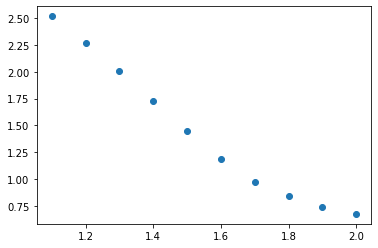

In [69]:
plt.plot(x_list, np.log(corr_mat[:,8]), 'o')

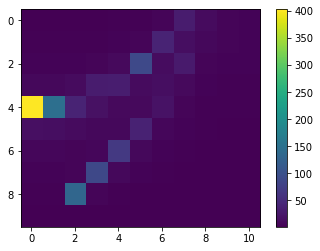

In [71]:
plt.imshow(corr_mat)
plt.colorbar()

It seems that there is a more complicated phase appears.....

Let's make a finer diagram in another notebook...